<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Evaluacion3/Evaluacion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Evaluación 3***
"Solución Numerica de Ecuaciones Reacción-Difusión" 

---

En esta la evaluacion 3 de Fisica Computacional, resolveremos numéricamente (utilizando diferencias finitas) ecuaciones reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas, variando en cada problema las condiciones iniciales.

De manera general la Ecuación de Reacción-Difusión en una dimensión está dada por la ecuación diferencial parcial:

$$\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}$$
donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos.

In [ ]:
#Aqui introducimos las bibliotecas a utilizar
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

*   # ***Ejercicio 1.*** 

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


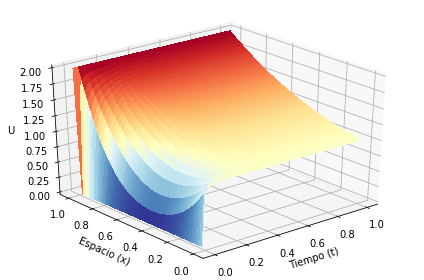

In [ ]:
#Utilizamos los codigos para los problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann proporcionados como material

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''
#GRID POINTS on space interval (número de pasos para el intervalo espacial)
M = 50 
# GRID POINTS on time interval (número de pasos para el intervalo temporal)
N = 60 

#Posición inicial
x0 = 0 
#Posición final (longitud del tubo en el extremo)
xL = 1 

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0 
# Tiempo final
tF = 1 

# ----- Time step -----
dt = (tF - t0)/(N - 1)

#Coeficiente de difusion
D = 1  
#Coeficiente de reaccion
alpha = -1 

#Realizamos un cambio de variable para simplificar el desarrollo del problema
r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Diagonal principal de la matriz A
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
#Diagonal inferior y superior de la matriz A
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

# ----- Initial condition -----
U[:,0] = 0 

# ----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0 

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct (verificar que la solución sea correcta):
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot (gráfica de la superficie) -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,cmap=cm.RdYlBu_r, antialiased=False)

ax.view_init(30, -130) 

ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Podemos observar como el compuesto (U), en el inicio el tubo esta en el vacio ya que en t=0 el valor del compuesto es cero. Conforme el tiempo transcurre el compuesto (U) aumenta rapidamente debido a que el tubo se comienza a llenar de ambos lados aunque, despues de un tiempo la concentración llega a un equilibrio por lo que se observa como la curva comienza a estabilizarse.

*   # ***Ejercicio 2.***

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


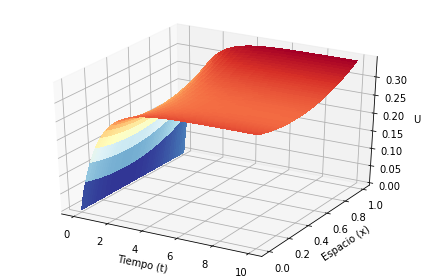

In [ ]:
#Utilizamos los codigos para los problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann proporcionados como material

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''
#GRID POINTS on space interval (número de pasos para el intervalo espacial)
M = 50 
# GRID POINTS on time interval (número de pasos para el intervalo temporal)
N = 60 

#Posicion inicial
x0 = 0 
#Posición final (longitud del tubo en el extremo)
xL = 1 

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0 
#Tiempo final
tF = 10 

# ----- Time step -----
dt = (tF - t0)/(N - 1)

#Coeficiente de difusion
D = 1 
#Coeficiente de reacción
alpha = -1

#Realizamos un cambio de variable para simplificar el desarrollo del problema
r = dt*D/dx**2
s = dt*alpha

a = 1 + 2*r - s

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Diagonal principal de la matriz A
main_diag = (1 + 2*r - s)*np.ones((1,M))
#Diagonal inferior y superior de la matriz A
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U1 = np.zeros((M, N))

# ----- Initial condition -----
U1[:,0] = 0 

# ----- Neumann boundary conditions -----
t = np.ones([N+1, 1]) 
f = 0.1*t # (0,t)
g = 0.2*t # (1,t)

for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U1[0:M, k-1])
    b = b1 + b2  # Right hand side
    U1[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct (verificar que la solución sea correcta):
gc = np.allclose(np.dot(A,U1[0:M,N-1]), b)
print(gc)

# ----- Surface plot (gráfica de la superficie) -----
X1, T1 = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X1, T1, U1, linewidth=0,cmap=cm.RdYlBu_r, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

En este caso observamos como el compuesto (U) actua de manera muy similar al problema anterior ya que conforme el tiempo transcurre el compuesto (U) aumenta rapidamente debido a que se comienza a llenar de ambos lados aunque parece que en este caso se llena con mayor velocidad de un lado que del otro pero, despues de un tiempo la concentración llega a un equilibrio por lo que se observa como la curva comienza a estabilizarse.


*   # ***Ejercicio 3.*** 

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


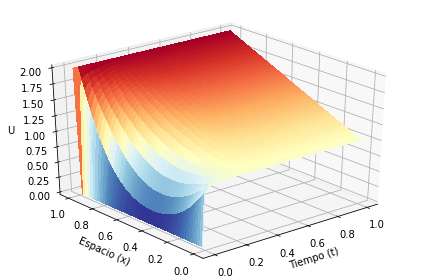

In [ ]:
#Utilizamos los codigos para los problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann proporcionados como material

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
and initial condition u(x,0) = 4*x - 4*x**2
'''
#GRID POINTS on space interval (número de pasos para el intervalo espacial)
M = 50 
# GRID POINTS on time interval (número de pasos para el intervalo temporal)
N = 60 

#Posicion inicial
x0 = 0 
#Posición final (longitud del tubo en el extremo)
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

#Tiempo inicial
t0 = 0 
#Tiempo final
tF = 1 

# ----- Time step -----
dt = (tF - t0)/(N - 1)

#Coeficiente de difusion
D = 1  
#Coeficiente de reaccion
alpha = 0 

#Realizamos un cambio de variable para simplificar el desarrollo del problema
r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

#Diagonal principal de la matriz A
main_diag = (1 + 2*r - s)*np.ones((1,M-2))
#Diagonal inferior y superior de la matriz A
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U2 = np.zeros((M, N))

# ----- Initial condition -----
U2[:,0] = 0 

# ----- Dirichlet boundary conditions -----
U2[0,:] = 1.0 
U2[-1,:] = 2.0 

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U2[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U2[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U2[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct (verificar que la solución sea correcta):
g = np.allclose(np.dot(A,U2[1:M-1,N-1]), b)
print(g)

# ----- Surface plot (gráfica de la superficie) -----
X2, T2 = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X2, T2, U2, linewidth=0,cmap=cm.RdYlBu_r, antialiased=False)

#ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

ax.view_init(30, -130)

ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Espacio (x)')
ax.set_zlabel('U')
plt.tight_layout()
plt.show()

Finalmente, este ultimo problema es muy similar al ejercicio 1 con la caracteristica de que el coeficiente de reacción es mayor resultando en una concentración ligeramente mayor y ya que los gases no reaccionan se alcanza el equilibrio mas rapidamente y esto se refleja en la curva a comparación del ejercicio 1 sin embargo, la diferencia en la concentración en los extremos del tubo se mantiene. 
